## Using a dataset from amazon mobile review to build and train a model

In [1]:
import gensim
import pandas as pd

In [22]:
#!/usr/bin/env python
# coding: utf-8

# In[19]:


import xml.etree.ElementTree as ET
from nltk.tokenize import word_tokenize


# In[6]:


tree = ET.parse('senseval2.data.xml')


# In[8]:


root = tree.getroot()


# In[14]:


text = []
for sentence in root.findall(".//sentence"):
    sentence_text = " ".join(sentence.itertext())
    sentence_text = sentence_text.replace('\n', '')
    text.append(sentence_text)


# In[17]:


text2 = []
for sent in text:
    cleaned_text = ' '.join(sent.split())
    text2.append(cleaned_text)
    


# In[22]:


final_text = []
for sent in text2:
    f = word_tokenize(sent)
    final_text.append(f)
final_text


[['The',
  'art',
  'of',
  'change-ringing',
  'is',
  'peculiar',
  'to',
  'the',
  'English',
  ',',
  'and',
  ',',
  'like',
  'most',
  'English',
  'peculiarities',
  ',',
  'unintelligible',
  'to',
  'the',
  'rest',
  'of',
  'the',
  'world',
  '.'],
 ['Dorothy', 'L.', 'Sayers', ',', '``', 'The', 'Nine', 'Tailors', '``'],
 ['ASLACTON', ',', 'England', '--'],
 ['Of',
  'all',
  'scenes',
  'that',
  'evoke',
  'rural',
  'England',
  ',',
  'this',
  'is',
  'one',
  'of',
  'the',
  'loveliest',
  ':',
  'An',
  'ancient',
  'stone',
  'church',
  'stands',
  'amid',
  'the',
  'fields',
  ',',
  'the',
  'sound',
  'of',
  'bells',
  'cascading',
  'from',
  'its',
  'tower',
  ',',
  'calling',
  'the',
  'faithful',
  'to',
  'evensong',
  '.'],
 ['The',
  'parishioners',
  'of',
  'St.',
  'Michael',
  'and',
  'All',
  'Angels',
  'stop',
  'to',
  'chat',
  'at',
  'the',
  'church',
  'door',
  ',',
  'as',
  'members',
  'here',
  'always',
  'have',
  '.'],
 ['In',

In [2]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [25]:
df2 = pd.DataFrame(columns = ['data'])

In [26]:
df2.data = text2
df2

,data
0,The art of change-ringing is peculiar to the E...
1,"Dorothy L. Sayers , `` The Nine Tailors ``"
2,"ASLACTON , England --"
3,"Of all scenes that evoke rural England , this ..."
4,The parishioners of St. Michael and All Angels...
...,...
237,Study after study -- the most recent from the ...
238,"With that authority , of course , goes an unam..."
239,Schools that are structured in this way produc...
240,"This is a fact -- though , in view of all the ..."


In [27]:
df2.shape

(242, 1)

In [4]:
df.reviewText[0]

"They look good and stick good! I just don't like the rounded shape because I was always bumping it and Siri kept popping up and it was irritating. I just won't buy a product like this again"

In [5]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [30]:
df_text = df2.data.apply(gensim.utils.simple_preprocess)

In [6]:
model = gensim.models.Word2Vec(window=20, min_count=2, workers=4)

In [33]:
model2 = gensim.models.Word2Vec(window=10, min_count=2, workers=4)

In [7]:
model.build_vocab(review_text, progress_per=1000)

In [35]:
model2.build_vocab(df_text, progress_per=1000)

In [8]:
model.epochs

5

In [36]:
model2.epochs

5

In [9]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(61509399, 83868975)

In [37]:
model2.train(df_text, total_examples=model2.corpus_count, epochs=model2.epochs)

(13073, 24540)

In [10]:
model.save("word2vec.model")

In [38]:
model2.save("textword2vec.model")

In [11]:
model.wv.most_similar("automobile")

[('electric', 0.5309031009674072),
 ('inverter', 0.5246471166610718),
 ('electrical', 0.5239759683609009),
 ('generously', 0.5196165442466736),
 ('altenate', 0.5165504813194275),
 ('impartial', 0.5148389339447021),
 ('acura', 0.512549877166748),
 ('vority', 0.512262225151062),
 ('powerbolt', 0.5063874125480652),
 ('ideal', 0.5042287707328796)]

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load Word2Vec model
model = Word2Vec.load("word2vec.model")

# Reading the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("mc.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return (1+similarity)*2
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculating similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Saving the results to a new CSV file
df.to_csv("similarity_results_mc_word2vec.csv", index=False)

print("Similarity results have been saved to 'similarity_results_mc_word2vec.csv'")

Error: "Key 'asylum' not present"
Error: "Key 'furnace' not present"
Error: "Key 'crane' not present"
Similarity results have been saved to 'similarity_results_mc_word2vec.csv'


In [6]:
model.wv.similarity("noon", "string")

-0.13000038

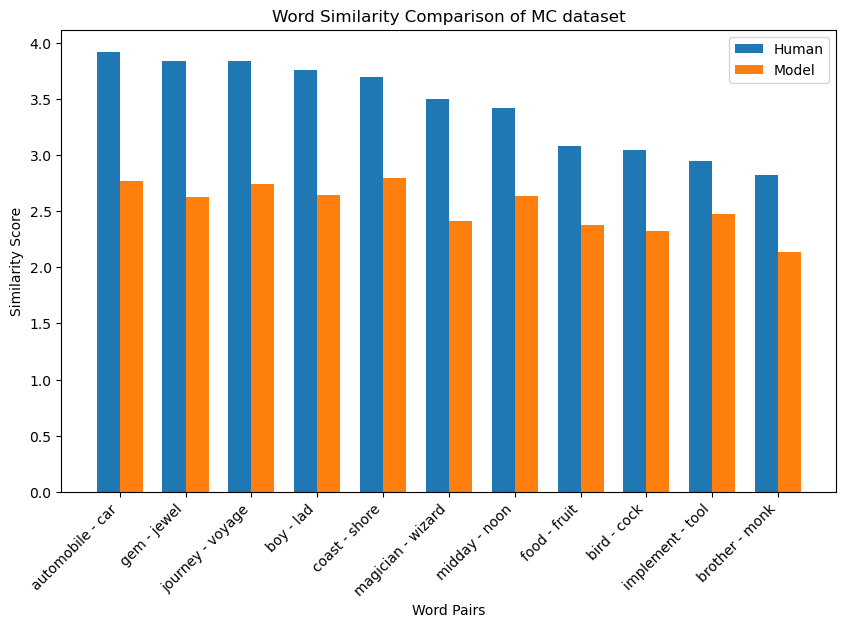

In [2]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of MC dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_mc_word2vec.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of MC dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


In [1]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Loading Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("rg.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return (1+similarity)*2
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculating similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Saving the results to a new CSV file
df.to_csv("similarity_results_RG_word2vec.csv", index=False)

print("Similarity results have been saved to 'similarity_results_RG_word2vec.csv'")

Error: "Key 'cemetery' not present"
Error: "Key 'woodland' not present"
Error: "Key 'furnace' not present"
Error: "Key 'crane' not present"
Error: "Key 'woodland' not present"
Error: "Key 'cemetery' not present"
Error: "Key 'oracle' not present"
Error: "Key 'crane' not present"
Error: "Key 'oracle' not present"
Error: "Key 'crane' not present"
Error: "Key 'asylum' not present"
Error: "Key 'furnace' not present"
Error: "Key 'tumbler' not present"
Error: "Key 'autograph' not present"
Error: "Key 'woodland' not present"
Error: "Key 'cemetery' not present"
Similarity results have been saved to 'similarity_results_RG_word2vec.csv'


In [ ]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of RG dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_RG_word2vec.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of RG dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


In [2]:
import pandas as pd
from gensim.models import Word2Vec
import csv

# Load your Word2Vec model
model = Word2Vec.load("word2vec.model")

# Read the dataset from the text file
# The columns are assumed to be ["word1", "word2", "human_similarity"]
df = pd.read_csv("wordsim_relatedness_goldstandard.txt", delimiter='\t', header=None, names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 4
        return (1+similarity)*5
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  

# Calculating similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Saving the results to a new CSV file
df.to_csv("similarity_results_wordsim_word2vec.csv", index=False)

print("Similarity results have been saved to 'similarity_results_wordsim_word2vec.csv'")

Error: "Key 'Jerusalem' not present"
Error: "Key 'OPEC' not present"
Error: "Key 'ecology' not present"
Error: "Key 'Maradona' not present"
Error: "Key 'OPEC' not present"
Error: "Key 'FBI' not present"
Error: "Key 'psychology' not present"
Error: "Key 'troops' not present"
Error: "Key 'proton' not present"
Error: "Key 'constellation' not present"
Error: "Key 'astronomer' not present"
Error: "Key 'psychology' not present"
Error: "Key 'Jerusalem' not present"
Error: "Key 'Arafat' not present"
Error: "Key 'psychology' not present"
Error: "Key 'seafood' not present"
Error: "Key 'psychology' not present"
Error: "Key 'psychology' not present"
Error: "Key 'psychology' not present"
Error: "Key 'FBI' not present"
Error: "Key 'psychology' not present"
Error: "Key 'Arafat' not present"
Error: "Key 'fertility' not present"
Error: "Key 'minister' not present"
Error: "Key 'psychology' not present"
Error: "Key 'dividend' not present"
Error: "Key 'psychology' not present"
Similarity results have been

In [ ]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of WS353 dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_wordsim_word2vec.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of WS353 dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()


## Gensim using fastext

In [3]:
import gensim
import pandas as pd

In [4]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [5]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [6]:
from gensim.models import FastText

model = gensim.models.FastText(vector_size=100, window=5, min_count=1, workers=4, sg=1)

In [7]:
model.build_vocab(review_text, progress_per=1000)

In [8]:
model.save("fasttext.model")

In [9]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset from the text file
df = pd.read_csv("wordsim_relatedness_goldstandard.txt", delimiter='\t', header=None, names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 5 * similarity + 5
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculating similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Saving the results to a new CSV file
df.to_csv("similarity_results_wordsim_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_wordsim_fasttext.csv'")


Similarity results have been saved to 'similarity_results_wordsim_fasttext.csv'


In [ ]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of wordsim dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_wordsim_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of wordsim353 dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()

In [1]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("mc.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 2 * similarity + 2
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculating similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Saving the results to a new CSV file
df.to_csv("similarity_results_mc_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_mc_fasttext.csv'")

Similarity results have been saved to 'similarity_results_mc_fasttext.csv'


In [ ]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of MC dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_mc_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of MC dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()

In [1]:
import pandas as pd
from gensim.models import FastText

# Load FastText model
model = FastText.load("fasttext.model")

# Read the dataset
# Assuming the file is delimited by semicolons and the columns are ["word1", "word2", "human_similarity"]
df = pd.read_csv("rg.csv", delimiter=';', names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.wv.similarity(row['word1'], row['word2'])
        transformed_similarity = 2 * similarity + 2
        return transformed_similarity
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_rg_fasttext.csv", index=False)

print("Similarity results have been saved to 'similarity_results_rg_fasttext.csv'")

Similarity results have been saved to 'similarity_results_rg_fasttext.csv'


In [ ]:
import tkinter as tk
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class WordSimilarityApp:
    def __init__(self, master):
        self.master = master
        master.title("Word Similarity Comparison of RG dataset")

        self.label = tk.Label(master, text="Word Similarity Comparison")
        self.label.pack()

        self.plot_button = tk.Button(master, text="Plot Similarities", command=self.plot_similarities)
        self.plot_button.pack()

        self.quit_button = tk.Button(master, text="Quit", command=master.quit)
        self.quit_button.pack()

    def plot_similarities(self):
        # Read the similarity results CSV file
        df = pd.read_csv("similarity_results_rg_fasttext.csv")

        # Filter out rows with NaN values in model_similarity
        df = df.dropna(subset=['model_similarity'])

        # Creating the bar plot
        fig, ax = plt.subplots(figsize=(10, 6))
        index = range(len(df))
        bar_width = 0.35

        bar1 = ax.bar(index, df['human_similarity'], bar_width, label='Human')
        bar2 = ax.bar([p + bar_width for p in index], df['model_similarity'], bar_width, label='Model')

        ax.set_xlabel('Word Pairs')
        ax.set_ylabel('Similarity Score')
        ax.set_title('Word Similarity Comparison of RG dataset')
        ax.set_xticks([p + bar_width / 2 for p in index])
        ax.set_xticklabels(df['word1'] + " - " + df['word2'], rotation=45, ha="right")
        ax.legend()

        canvas = FigureCanvasTkAgg(fig, master=self.master)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack()
        canvas.draw()

root = tk.Tk()
app = WordSimilarityApp(root)
root.mainloop()

## Glove

In [1]:
import gensim
import pandas as pd
from gensim.scripts.glove2word2vec import glove2word2vec

In [2]:
df = pd.read_json("reviews_Cell_Phones_and_Accessories_5.json", lines=True)

In [3]:
review_text = df.reviewText.apply(gensim.utils.simple_preprocess)

In [4]:
model = gensim.models.Word2Vec(window=10, min_count=2, workers=4)

In [5]:
model.build_vocab(review_text, progress_per=1000)

In [6]:
# Save the Word2Vec model in GloVe format
model.wv.save_word2vec_format("glove_model.txt", binary=False)

In [7]:
#glove2word2vec("glove_model.txt", "glove_model_in_word2vec_format.txt")

In [ ]:
import pandas as pd
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Convert the GloVe model into word2vec format
glove_input_file = "glove_model.txt"
word2vec_output_file = "glove_model_in_word2vec_format.txt"
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the model in word2vec format
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Read the dataset
df = pd.read_csv("wordsim_relatedness_goldstandard.txt", delimiter='\t', header=None, names=["word1", "word2", "human_similarity"])

# Function to calculate similarity
def calculate_similarity(row):
    try:
        similarity = model.similarity(row['word1'], row['word2'])
        # Transform the similarity to be in the range of 0 to 10
        return 5 * similarity + 5
    except KeyError as e:
        print(f"Error: {str(e)}")
        return None  # Returning None if any of the words is not in the vocabulary

# Calculate similarity for each row
df['model_similarity'] = df.apply(calculate_similarity, axis=1)

# Save the results to a new CSV file
df.to_csv("similarity_results_Glove.csv", index=False)

print("Similarity results have been saved to 'similarity_results_Glove.csv'")
